# Course Final Project - Mall Customer Clustering

*Author: Xu Wang 2022.2.13.*

**(Unsupervised machine learning course final project from IBM)**\
Requirements:\
Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

Sections required in your report:

- Main objective of the analysis that also specifies whether your model will be focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data.

- Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

- Brief summary of data exploration and actions taken for data cleaning orfeature engineering.

- Summary of training at least three variations of the unsupervised model you selected. For example, you can use different clustering techniques or different hyperparameters.

- A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms.

- Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

- Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.



# Main objectives of this project

- This project will be focused on **clustering**.


- From the algorithms of clustering comparison, there are several advices and implications will be provided in  business prospectives, which may help stakeholders for business development and customer retention.


- By the end of this case study, it will **achieve customer segmentation, target customer classification with marketing strategies.**


# Brief description of the data

- The data is from a small part of supermarket mall and through its membership cards data for the purpose of market basket analysis.


- The data has 200 observations (rows) and 5 columns.


- The columns include Customer ID, Gender, Age, Annual Income and Spending score.


- **Spending Score** is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.


- Through this data, it will help to **understand the customers like who can be easily converge (valuable targeted customers), so that the sense can be given to marketing team and plan the strategy accordingly.**


- Source: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python/version/1

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os
os.chdir('Data')
from colorsetup import colors, palette
sns.set_palette(palette)
data = pd.read_csv('Mall_Customers.csv')

data.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [2]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.rename(index=str, columns={'Annual Income (k$)':'Income',
                               'Spending Score (1-100)':'Score'}, inplace=True)
data

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


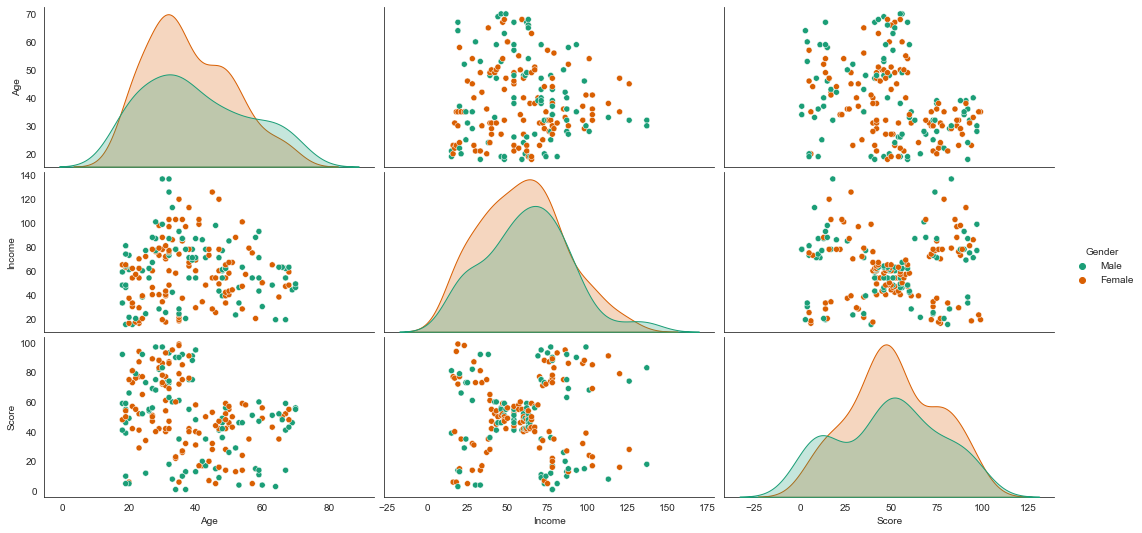

In [14]:
#Check gender distribution
sns.set_palette('Dark2')
sns.pairplot(data.drop('CustomerID',axis=1), hue='Gender',aspect=2)
plt.show()

In [23]:
#Since CustomerID and Gender are useless in model training
df = data.drop(['CustomerID','Gender'], axis=1)
df.head()


,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [24]:
df.corr()

,Age,Income,Score
Age,1.000000,-0.012398,-0.327227
Income,-0.012398,1.000000,0.009903
Score,-0.327227,0.009903,1.000000


# Summary of EDA and data cleaning

1. As the data only has 200 customers data which include their gender, income and spending scores, there is no null and noisy values to process.

2. We aim to experiment in cluster models training later, so the Customer ID is irrelevant and it will be removed.

3. From the above pairplot, Gender also has no direct relation to customer segmentation, as result Gender will be removed as well.

# Clustering models

## Kmeans

In [25]:
from sklearn.cluster import KMeans

km_list= list()

for i in range(1,11):
    km=KMeans(n_clusters=i, random_state=20)
    km=km.fit(df)
    km_list.append(pd.Series({'cluster':i, 
                              'inertia':km.inertia_,
                             'model':km}))
km_list

[cluster                                        1
 inertia                                308812.78
 model      KMeans(n_clusters=1, random_state=20)
 dtype: object,
 cluster                                        2
 inertia                            212840.169821
 model      KMeans(n_clusters=2, random_state=20)
 dtype: object,
 cluster                                        3
 inertia                            143342.751572
 model      KMeans(n_clusters=3, random_state=20)
 dtype: object,
 cluster                                        4
 inertia                            104366.151456
 model      KMeans(n_clusters=4, random_state=20)
 dtype: object,
 cluster                                        5
 inertia                             75350.779172
 model      KMeans(n_clusters=5, random_state=20)
 dtype: object,
 cluster                                        6
 inertia                             58302.406309
 model      KMeans(n_clusters=6, random_state=20)
 dtype: object,
 clu

In [29]:
plot_data = pd.concat(km_list, axis=1).T[['cluster','inertia']].set_index('cluster')
plot_data

,inertia
cluster,
1,308812.78
2,212840.169821
3,143342.751572
4,104366.151456
5,75350.779172
6,58302.406309
7,51118.949932
8,44344.28038
9,40919.961404


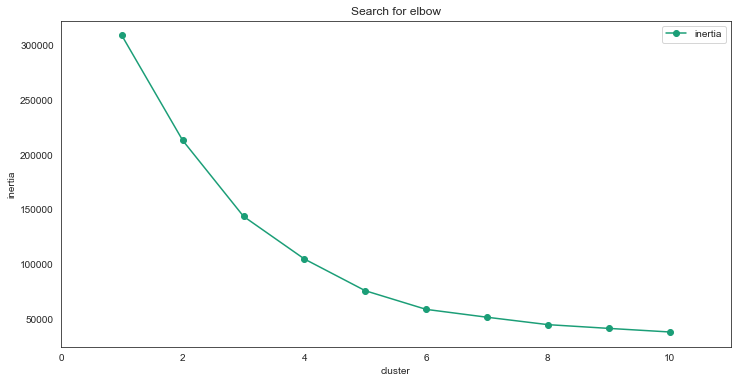

In [40]:
ax = plot_data.plot(marker='o', ls='-',figsize=(12,6))
ax.set_xticks(range(0,11,2))
ax.set_xlim(0,11)
ax.set(xlabel = 'cluster', ylabel='inertia')
ax.set_title('Search for elbow');

From the above figure, its elbow point may be 3 or 5.\
**Possible cluster=3 or cluster=5**

### cluster=3

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


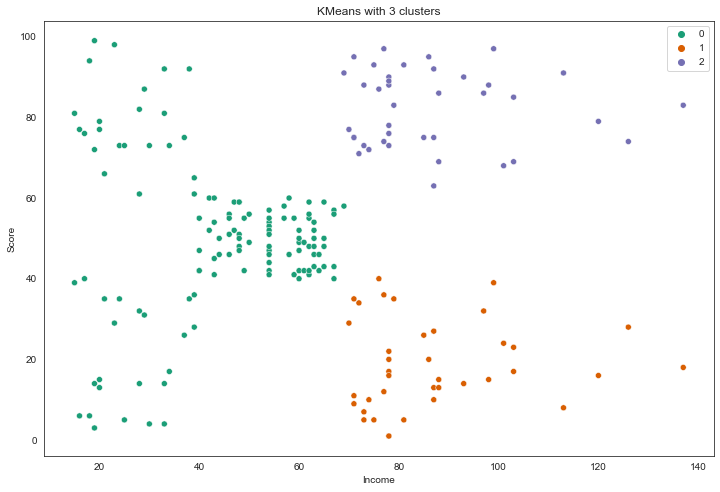

In [48]:
km3 = KMeans(n_clusters=3, random_state=20).fit(df)

plt.figure(figsize=(12,8))
sns.scatterplot(df['Income'], df['Score'], hue=km3.labels_, palette='Dark2')
plt.title('KMeans with 3 clusters')
plt.show()

### cluster = 5

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


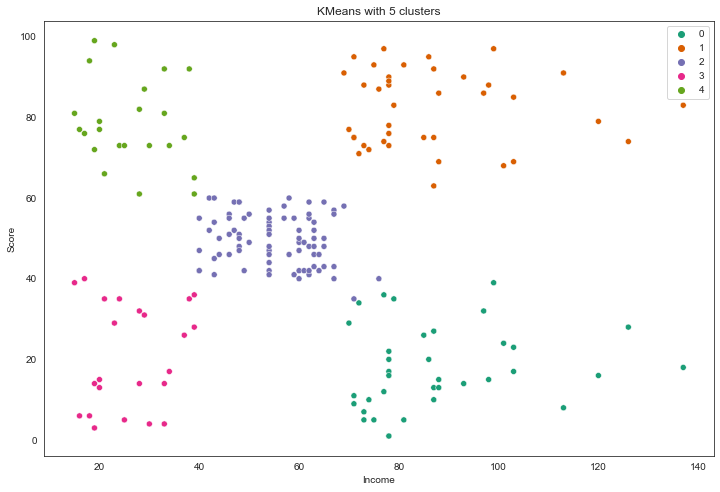

In [47]:
km5 = KMeans(n_clusters=5, random_state=20).fit(df)

plt.figure(figsize=(12,8))
sns.scatterplot(df['Income'],df['Score'], hue=km5.labels_, palette='Dark2')
plt.title('KMeans with 5 clusters')
plt.show()

### 5 clusters and their labels

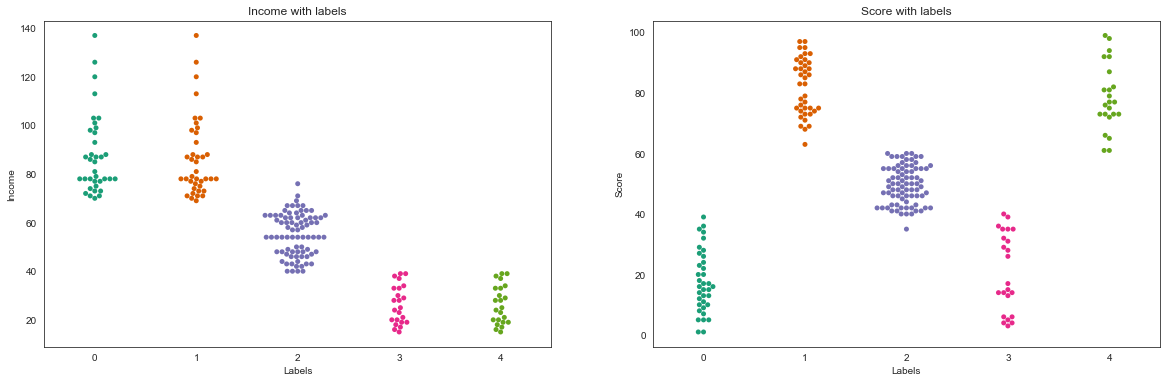

In [50]:
df['Labels'] = km5.labels_
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(121)
sns.swarmplot(x = 'Labels', y= 'Income', data=df, ax=ax)
ax.set_title('Income with labels')

ax = fig.add_subplot(122)
sns.swarmplot(x = 'Labels', y= 'Score', data=df, ax=ax)
ax.set_title('Score with labels')

plt.show()

By looking at the comparison of 3 clusters and 5 clusters with KMeans, clearly it's better to have 5 clusters.

It will be classified as 5 classes of customers: \
(score = spending score)


- label 0 : customers with high income and low score 
- label 1 : customers with high income and high score
- label 2 : customers with medium income and mudium score
- label 3 : customers with low income and low score
- label 4 : customers with low income and high score

In [51]:
df.head()

,Age,Income,Score,Labels
0,19,15,39,3
1,21,15,81,4
2,20,16,6,3
3,23,16,77,4
4,31,17,40,3


## Hierarchy clusters

### cluster=5 ward linkage

In [52]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

ag = AgglomerativeClustering(n_clusters=5, linkage='ward', compute_full_tree=True)
ag = ag.fit(df)
df['Labels'] = ag.labels_

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


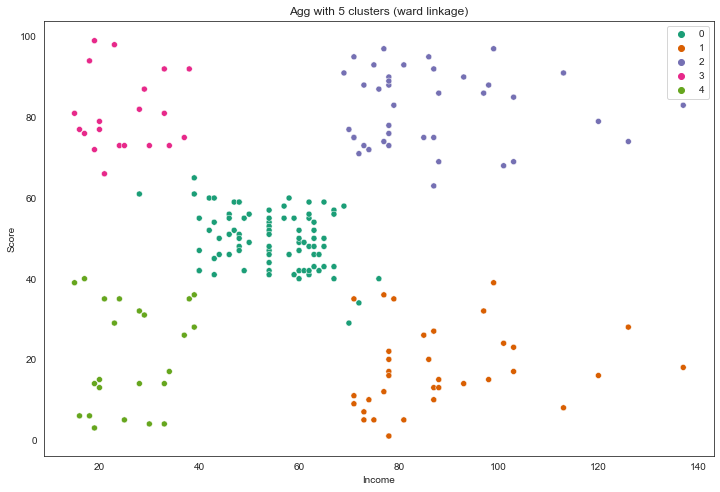

In [81]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['Income'], df['Score'], hue=ag.labels_ , palette='Dark2')
plt.title('Agg with 5 clusters (ward linkage)')
plt.show()

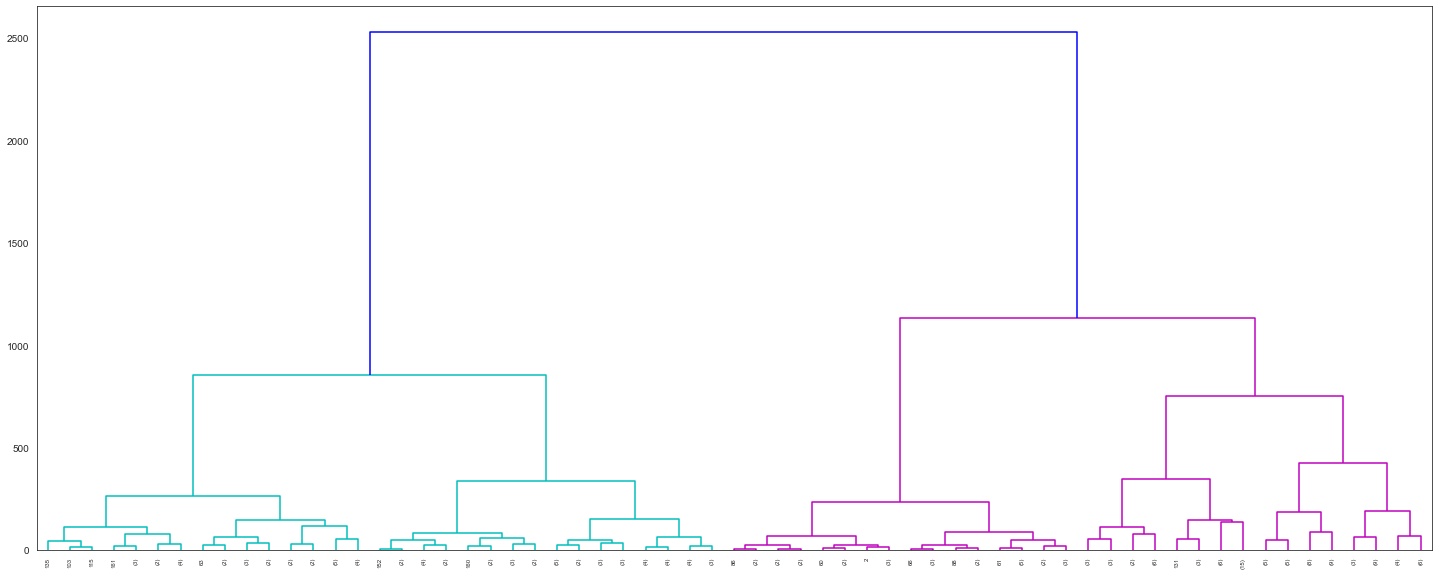

In [91]:
Z = hierarchy.linkage(ag.children_, method='ward')
fig, ax = plt.subplots(figsize=(25,10))
hierarchy.set_link_color_palette(['c','m','y','k','b'])
den = hierarchy.dendrogram(Z,
                           orientation='top',
                           p=5, 
                           truncate_mode='level',
                           show_leaf_counts=True, 
                           ax=ax,
                           above_threshold_color='b')

### cluster=5 average linkage

In [93]:
ag1=AgglomerativeClustering(n_clusters=5, linkage='average', compute_full_tree=True).fit(df)
df['Labels']=ag1.labels_

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


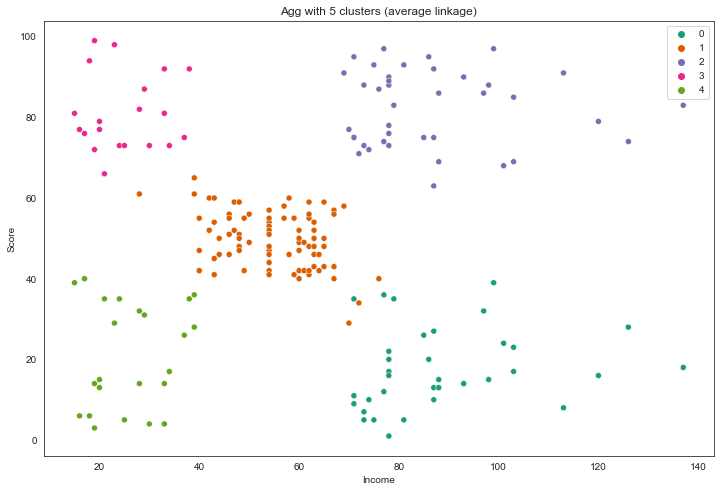

In [94]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['Income'], df['Score'], hue=ag1.labels_ , palette='Dark2')
plt.title('Agg with 5 clusters (average linkage)')
plt.show()

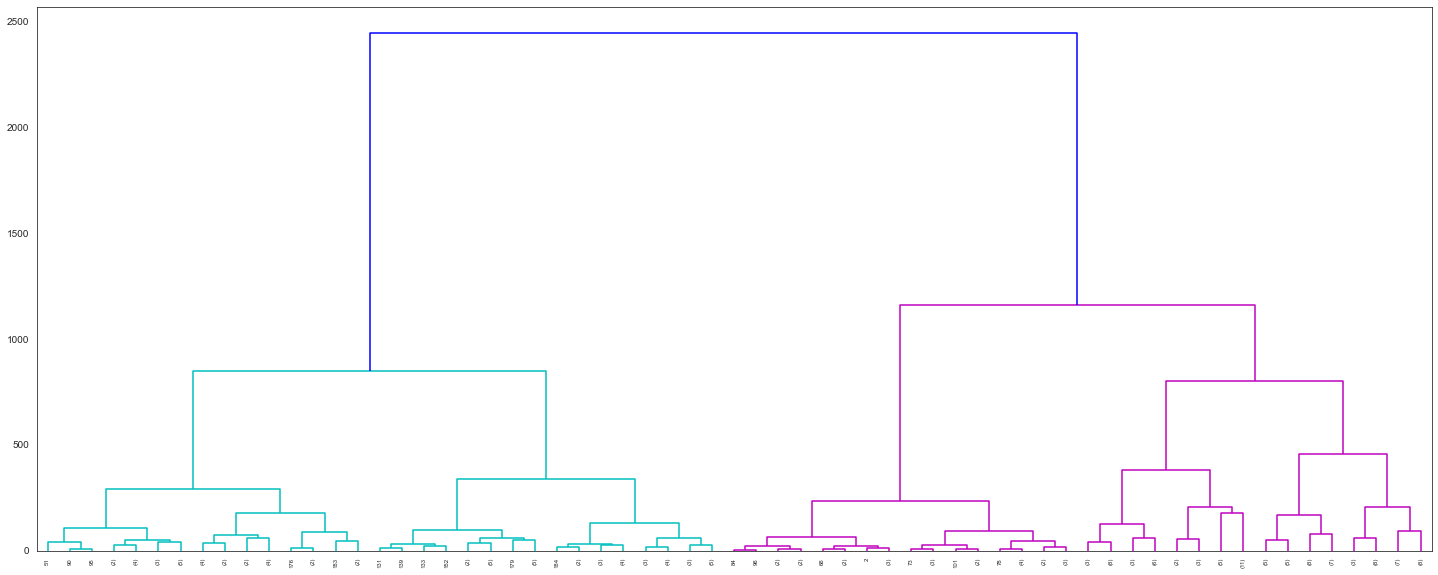

In [95]:
Z = hierarchy.linkage(ag1.children_, method='ward')
fig, ax = plt.subplots(figsize=(25,10))
hierarchy.set_link_color_palette(['c','m','y','k','b'])
den = hierarchy.dendrogram(Z,
                           orientation='top',
                           p=5, 
                           truncate_mode='level',
                           show_leaf_counts=True, 
                           ax=ax,
                           above_threshold_color='b')

## DBSCAN

It works with 2 parameters : epsilon and min point

### 6 clusters (eps=13, min_samples=4)

In [113]:
from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps=13, min_samples=4).fit(df)
df['Labels'] = dbsc.labels_
df.head()

,Age,Income,Score,Labels
0,19,15,39,0
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,0


/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


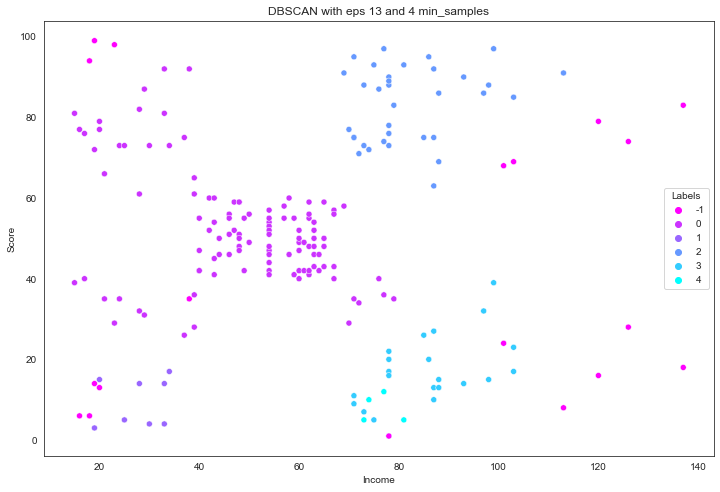

In [115]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['Income'], df['Score'], hue=df['Labels'], palette='cool_r')
plt.title("DBSCAN with eps 13 and 4 min_samples")
plt.show()

### 4 clusters (eps=13, min_samples=8)

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


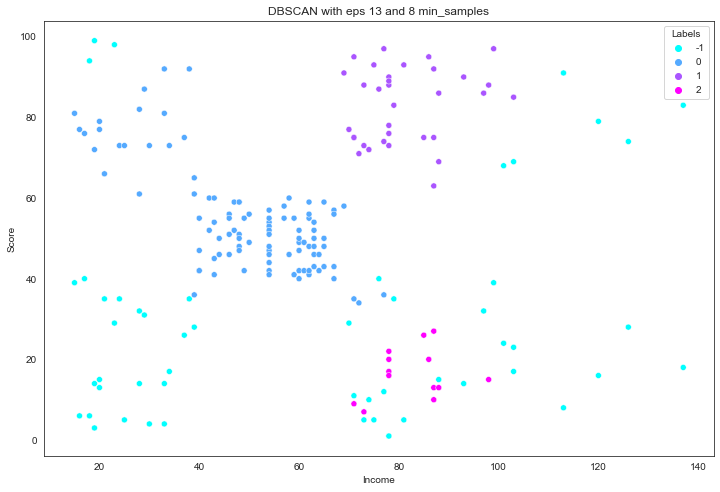

In [120]:
dbsc2=DBSCAN(eps=13,min_samples=8).fit(df)
df['Labels'] = dbsc2.labels_

plt.figure(figsize=(12,8))
sns.scatterplot(df['Income'], df['Score'], hue=df['Labels'], palette='cool')
plt.title("DBSCAN with eps 13 and 8 min_samples")
plt.show()

### 5 clusters (eps=10, min_samples=8)

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


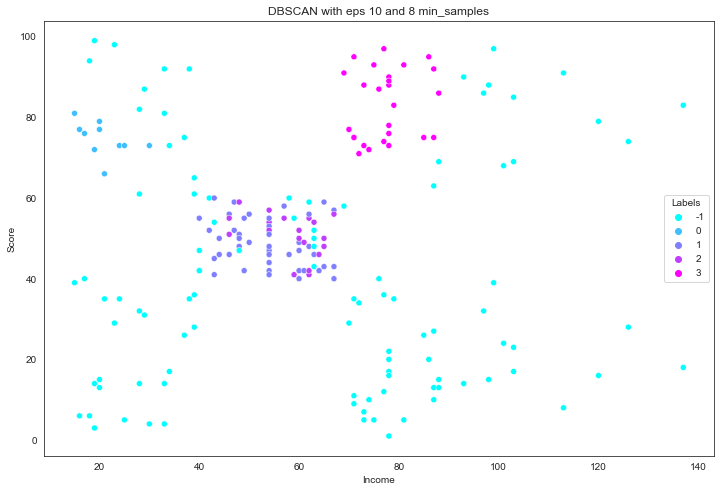

In [131]:
dbsc3=DBSCAN(eps=10,min_samples=8).fit(df)
df['Labels'] = dbsc3.labels_

plt.figure(figsize=(12,8))
sns.scatterplot(df['Income'], df['Score'], hue=df['Labels'], palette='cool')
plt.title("DBSCAN with eps 10 and 8 min_samples")
plt.show()

## Mean Shift

### Mean shift w=5

In [135]:
from sklearn.cluster import MeanShift , estimate_bandwidth

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


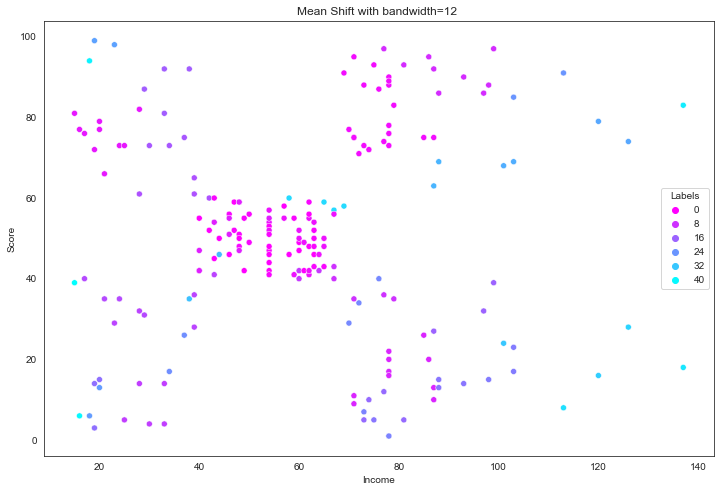

In [139]:
ms = MeanShift(bandwidth=12).fit(df)
df['Labels'] = ms.labels_

plt.figure(figsize=(12,8))
sns.scatterplot(df['Income'], df['Score'], hue=df['Labels'], palette='cool_r')
plt.title("Mean Shift with bandwidth=12 ")
plt.show()

### Mean shift , estimate w

/Library/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass bandwidth=22.173844534734847 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


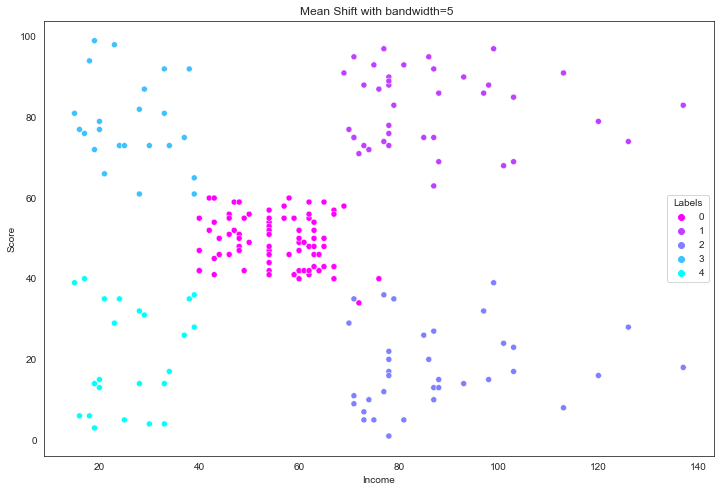

In [141]:
from sklearn.cluster import estimate_bandwidth
df = df.drop(['Labels'],axis=1)
bandwidth = estimate_bandwidth(df, quantile=0.1)
ms = MeanShift(bandwidth).fit(df)
df['Labels'] = ms.labels_

plt.figure(figsize=(12,8))
sns.scatterplot(df['Income'], df['Score'], hue=df['Labels'], palette='cool_r')
plt.title("Mean Shift with bandwidth=5 ")
plt.show()

# Summary of models comparison

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/a

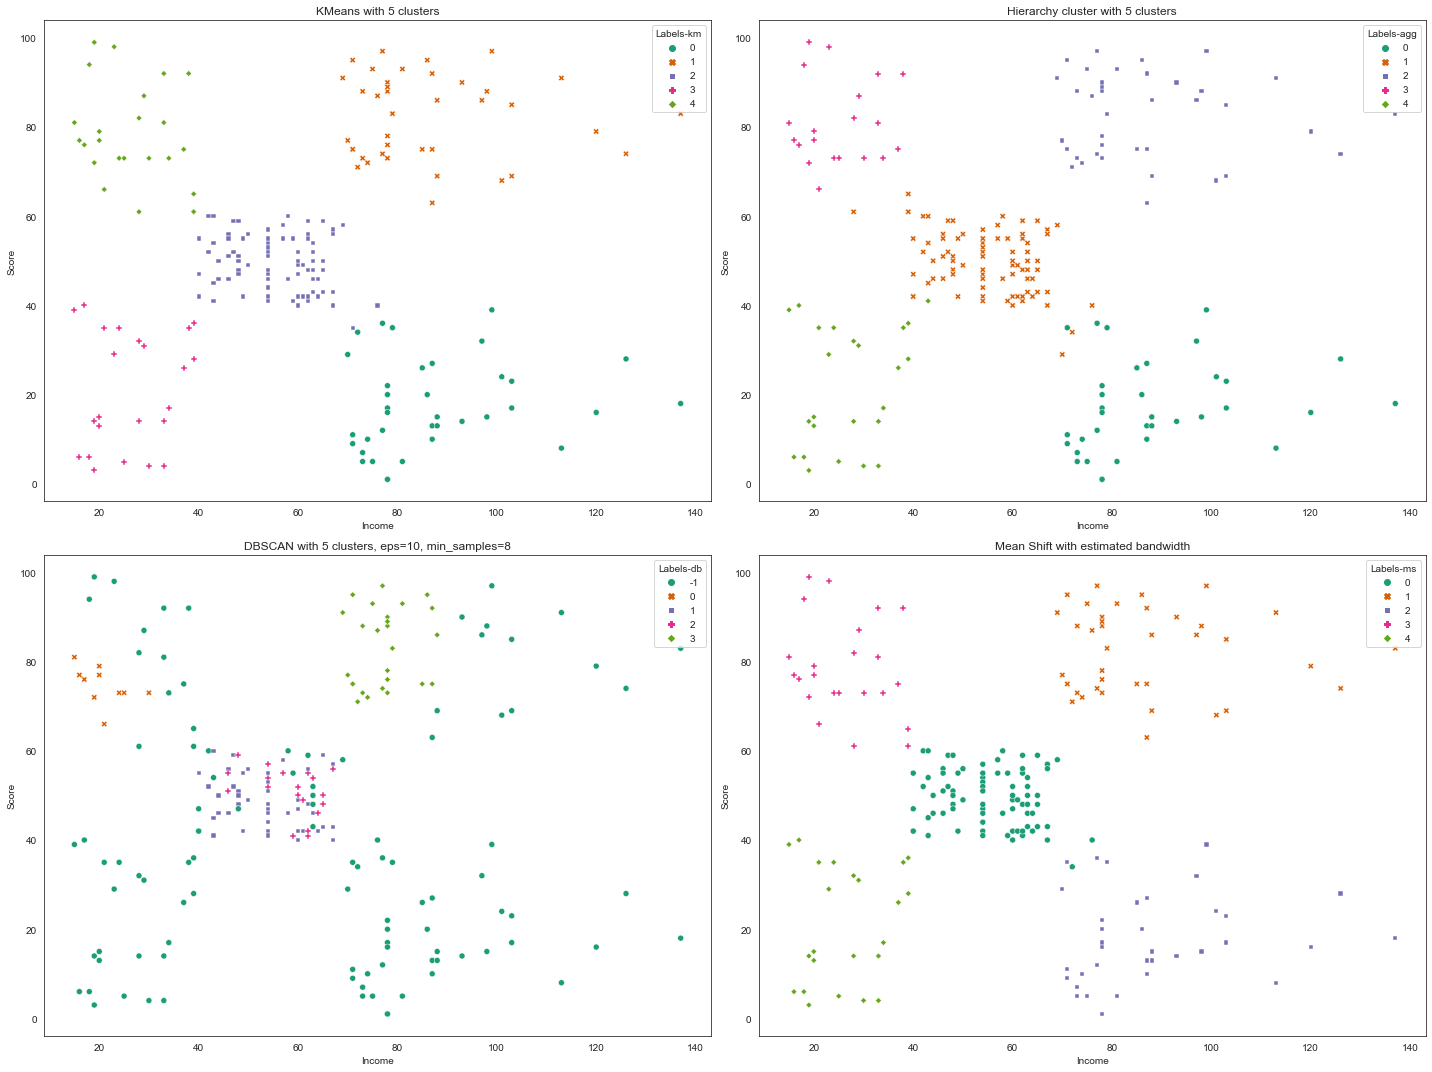

In [142]:
# Combine 4 models together

df = df.drop(['Labels'], axis=1)
df1 = df.copy()

fig = plt.figure(figsize=(20,15))

##KMeans##
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5, random_state=20).fit(df1)
df['Labels-km'] = km5.labels_
sns.scatterplot(df['Income'], df['Score'], hue=df['Labels-km'], style=df['Labels-km'], palette='Dark2')
ax.set_title('KMeans with 5 clusters')

##Hierarchy clusters##
ax = fig.add_subplot(222)

agg = AgglomerativeClustering(n_clusters=5, linkage='average').fit(df1)
df['Labels-agg'] = agg.labels_
sns.scatterplot(df['Income'], df['Score'], hue=df['Labels-agg'], style=df['Labels-agg'], palette='Dark2')
ax.set_title('Hierarchy cluster with 5 clusters')

##DBSCAN##
ax=fig.add_subplot(223)

dbsc=DBSCAN(eps=10,min_samples=8).fit(df1)
df['Labels-db'] = dbsc.labels_
sns.scatterplot(df['Income'], df['Score'], hue=df['Labels-db'], style=df['Labels-db'], palette='Dark2')
ax.set_title('DBSCAN with 5 clusters, eps=10, min_samples=8')

##Mean Shift##
ax = fig.add_subplot(224)

bandwidth = estimate_bandwidth(df1, quantile=0.1)
ms = MeanShift(bandwidth).fit(df1)
df['Labels-ms'] = ms.labels_
sns.scatterplot(df['Income'], df['Score'], hue=df['Labels-ms'], style=df['Labels-ms'], palette='Dark2')
ax.set_title('Mean Shift with estimated bandwidth')

plt.tight_layout()
plt.show()

In [143]:
df.head(10)

,Age,Income,Score,Labels-km,Labels-agg,Labels-db,Labels-ms
0,19,15,39,3,4,-1,4
1,21,15,81,4,3,0,3
2,20,16,6,3,4,-1,4
3,23,16,77,4,3,0,3
4,31,17,40,3,4,-1,4
5,22,17,76,4,3,0,3
6,35,18,6,3,4,-1,4
7,23,18,94,4,3,-1,3
8,64,19,3,3,4,-1,4
9,30,19,72,4,3,0,3


**Comparing above four algorithms:**

- Kmeans is my preferable model if considering the data size, time consuming and elbom (inertia) point to locate the cluster k.

- Mean Shift is second preferable model when using the 'estimation_bandwidth' to estimate automatically w, and quickly find out the clusters.

- When using the elbom point (3 or 5), it is easy to use hierarchy clustering to find out the details of hierarchy structure of data.

- DBSCAN is helpful for outliers. However, to find out the optimal epsilon and min_samples point is difficult. If not using inertia elbom way to roughly find k-clusters, it is very hard to tune the parameters fine and easy to confused by lots of outliers. 



# Key findings and insights

In [147]:
df['Labels-km'].value_counts(ascending=False)

2    79
1    39
0    36
3    23
4    23
Name: Labels-km, dtype: int64

Using the Kmeans with cluster=5, we can locate the customers as follow:
- label 0 : 36 customers with high income and low score 
- label 1 : 39 customers with high income and high score
- label 2 : 79 customers with medium income and mudium score
- label 3 : 23 customers with low income and low score
- label 4 : 23 customers with low income and high score

**Furthermore, the segmentation is very useful in business marketing strategy and customer retention in future.**

# Possible suggestions of next move

Since this data is quite small and for computation convenience.
1. If data size becomes larger, and more features information of customers gatherer, it has more space to explore on these 4 clustering algorithms to try.
2. If in business aspect, outliers can be also valuable. DBSCAN has advantages of finding outliers which helps to locate some potential customers.
3. Also, in marketing aspect, market fractionize will be important to build marketing strategies while the hierarchical agglomerative clustering will be useful to locate the customers in different market fractionizations/segments in good-visual way.
4. If there is target data, such as churn-or-not/membership pay-or-not data in real-world, will be helpful to evaluate clustering good or not, and becomes supervised problems to validate results.

The End - 2022.2.13. 